# 단변량분석_범주형변수

<img src='https://github.com/DA4BAM/image/blob/main/%EB%8B%A8%EB%B3%80%EB%9F%89%EB%B6%84%EC%84%9D.png?raw=true' width=400/>

# 1.환경준비

## (1) 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## (2) 데이터 로딩

### 1) titanic
* url :  'https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic_simple.csv'

**[titanic_simple 데이터 셋 정보]**

- PassengerId : 승객번호
- Survived : 생존여부(1:생존, 0:사망)
- Pclass : 객실등급(1:1등급, 2:2등급, 3:3등급)
- Name : 승객이름
- Sex : 성별(male, female)
- Age : 나이
- Fare : 운임($)
- Embarked : 승선지역(Southhampton, Cherbourg, Queenstown)

In [2]:
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic_simple.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,Southhampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southhampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southhampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,Southhampton


### 2) 신용대출 신청 데이터

* url : https://raw.githubusercontent.com/DA4BAM/dataset/master/credit_NA.csv

|	칼럼명	|	설명	|		|	값 설명	|
|	----	|	----	|	----	|	----	|
|	**Creditability**	|	Creditability	|	신용도	|	0 : 낮은 신용도, 1 : 높은 신용도, **Target**	|
|	AccountBalance	|	Account Balance	|	은행잔고	|	1: No account, 2 : None (No balance), 3 : Some Balance	|
|	CreditDuration	|	Duration of Credit (month)	|	 신청한 대출기간(월)	|	숫자	|
|	CreditAmount	|	Credit Amount($)	|	신청한 대출금액	|	숫자	|
|	Employment	|	Length of current employment(Month)	|	현 직업 근무 기간	|	1: Unemployed, 2: <1 Year, 3: [1, 4), 4: [4, 7), 5: Above 7	|
|	SexMarital	|	Sex & Marital Status	|	성별 & 결혼상태	|	1: Male, Divorced, 2: Male, Single, 3: Male, Married/Widowed, 4: Female	|
|	CurrentAddress	|	Duration in Current address	|	현 거주지 거주기간	|	1: <1 Year , 2: [1, 4), 3: [4, 7), 4: Above 7	|
|	Age	|	Age (years)	|	나이	|	숫자	|
|	Occupation	|	Occupation	|	직업	|	1: Unemployed, unskilled, 2: Unskilled Permanent Resident, 3: Skilled, 4: Executive	|
|	ForeignWorker	|	Foreign Worker	|	외국인 근로자 여부	|	1: No, 2: Yes	|

In [3]:
credit = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/credit_NA.csv')
credit.drop(['Payment','Purpose','MostValuable','AppartmentType','NoCredits','Telephone'], axis = 1, inplace = True)
credit.head()

,Creditability,AccountBalance,CreditDuration,CreditAmount,Employment,SexMarital,CurrentAddress,Age,Occupation,ForeignWorker
0,1,3,24,1249,2,4,2,28.0,3,1
1,1,2,9,276,3,4,4,22.0,2,1
2,1,1,18,1049,2,2,4,21.0,3,1
3,1,1,24,6419,5,2,4,NaN,4,1
4,1,3,12,1424,5,2,4,55.0,4,1


# 2.기초 통계량

* 범주형 변수는 범주별 빈도수와 비율을 확인합니다.
* 리스트.count(‘값’) 
    * 해당 값이 몇 개 있는지 count 해 줍니다.
    * Count를 전체 개수(len(gender))로 나눠주면 비율이 됩니다.
    * 그런데, 범주가 두 세 개 정도면 이렇게 계산하는 게 가능합니다.
    * 만약 범주가 10개라면?


1) 리스트를 이용한 기초통계량

In [4]:
gender = ['F','M','F','F','F','M','F','M','M']

f_cnt = gender.count('F')
m_cnt = gender.count('M')
total_cnt = len(gender)

print('F', f_cnt, f_cnt/total_cnt)
print('M', m_cnt, m_cnt/total_cnt)

F 5 0.5555555555555556
M 4 0.4444444444444444


2) 판다스를 이용한 기초통계량

* 판다스의 .value_counts()
    * 범주의 개수와 상관 없이 범주 별 개수를 count 해 줍니다.

In [5]:
print(titanic['Pclass'].value_counts())
print(titanic['Pclass'].value_counts()/titanic.shape[0])

3    491
1    216
2    184
Name: Pclass, dtype: int64
3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64


* titanic['Pclass’] 해석
    * .value_counts()를 이용하여 범주별 빈도수와 범주별 비율을 구할수 있습니다.
    * 3등급 객실 탑승객이 전체에서 55%를 차지합니다.
    * 1등급 객실이 24%, 2등급 객실이 20.7 % 



<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

1) titanic의 Embarked에 대한 기초 통계량을 구하시오.

In [11]:
print(titanic['Embarked'].isna().sum())
print(titanic['Embarked'].value_counts())
print(titanic['Embarked'].value_counts()/titanic.shape[0]) # 1
print(titanic['Embarked'].value_counts()/titanic['Embarked'].count()) # 2

2
Southhampton    644
Cherbourg       168
Queenstown       77
Name: Embarked, dtype: int64
Southhampton    0.722783
Cherbourg       0.188552
Queenstown      0.086420
Name: Embarked, dtype: float64
Southhampton    0.724409
Cherbourg       0.188976
Queenstown      0.086614
Name: Embarked, dtype: float64


2) titanic의 Survived에 대한 기초 통계량을 구하시오.

In [7]:
val = 'Survived'
print(titanic['Survived'].value_counts())
print(titanic['Survived'].value_counts()/titanic.shape[0])

0    549
1    342
Name: Survived, dtype: int64
0    0.616162
1    0.383838
Name: Survived, dtype: float64


# 3.시각화

## (1) bar chart

* 기본차트

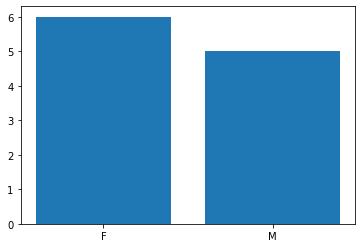

In [12]:
gender = ['F','M']
cnt = [6, 5]

plt.bar(gender, cnt)
plt.show()

* 데이터프레임으로 부터 barchart 그리기
    * 범주 이름과 값이 필요하므로, 집계작업이 선행되어야 함.
    * 판다스의 value_counts()를 사용하여 집계
        * 집계결과의 index : 범주 이름
        * 집계결과의 values : 값


In [15]:
temp = titanic['Pclass'].value_counts()
print(temp)
print(temp.index)
print(temp.values)

3    491
1    216
2    184
Name: Pclass, dtype: int64
Int64Index([3, 1, 2], dtype='int64')
[491 216 184]


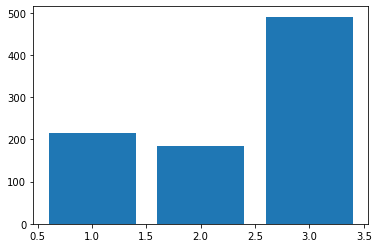

In [14]:
plt.bar(temp.index, temp.values)
plt.show()

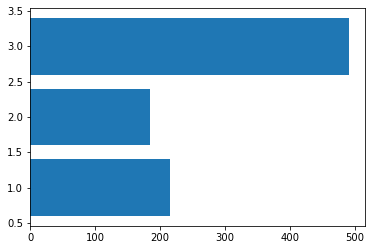

In [17]:
# barh 옆으로 그려짐
plt.barh(temp.index, temp.values)
plt.show()

* seaborn의 countplot
    * 집계 + bar plot을 한꺼번에

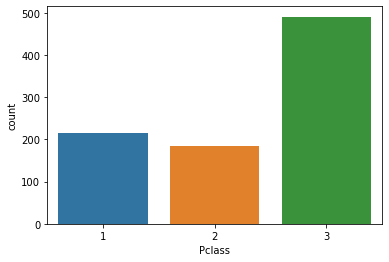

In [16]:
sns.countplot(titanic['Pclass'])
plt.show()

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

1) titanic의 Embarked에 대한 bar chart를 그리시오.

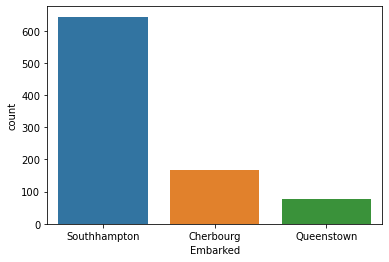

In [20]:
## x축과 y축을 지정해야됨
sns.countplot(titanic['Embarked'])
plt.show()

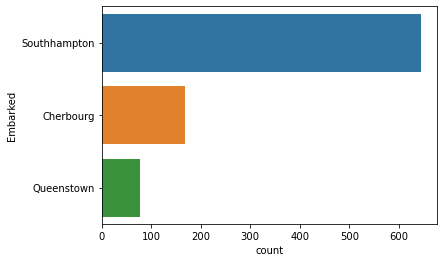

In [22]:
sns.countplot(y=titanic['Embarked'])
plt.show()

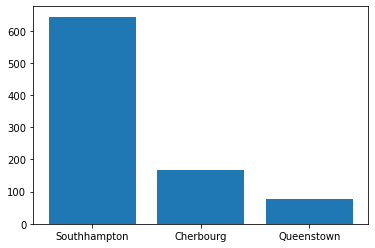

In [21]:
temp = titanic['Embarked'].value_counts()
plt.bar(temp.index,temp.values)
plt.show()

## (2) pie chart

* 범주별 비율 비교할 때 파이차트 사용.
* 역시 먼저 집계를 해야 합니다.
* plt.pie( 값, labels=범주이름, autopct = ‘%.2f%%’)
    * autopct = ‘%**.2f%**%’ : 그래프에 표시할 값 비율 값에 대한 설정입니다.
        * **.2f%** : 소수점 두 자리 퍼센트로 표기 한다는 의미.


* pie chart 기본

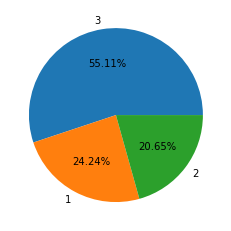

In [4]:
temp = titanic['Pclass'].value_counts()

plt.pie(temp.values, labels = temp.index, autopct = '%.2f%%')
plt.show()

* pie chart 꾸미기 1

    * 각도와 방향 조정
        * startangle = 90 : 90도 부터 시작
        * counterclock = False : 시계 방향으로

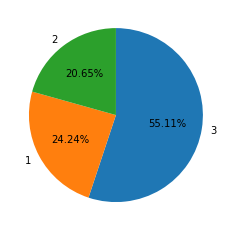

In [8]:
plt.pie(temp.values, labels = temp.index, autopct = '%.2f%%', 
        startangle=90, counterclock=False)
plt.show()

* pie chart 꾸미기 2

    * 간격 띄우고, 그림자 넣기
        * explode = [0.05, 0.05,0.05] : 중심으로 부터 1,2,3 을 얼마만큼 띄울지
        * shadow = True : 그림자 추가



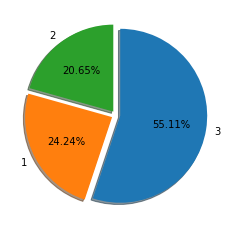

In [9]:
plt.pie(temp.values, labels = temp.index, autopct = '%.2f%%', 
        startangle=90, counterclock=False, 
        explode = [0.05, 0.05, 0.05], shadow=True)
plt.show()

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

1) titanic의 Embarked에 대한 pie chart를 그리시오.
* 소수점 1자리까지 비율(%)를 표시하시오.

Southhampton    644
Cherbourg       168
Queenstown       77
Name: Embarked, dtype: int64


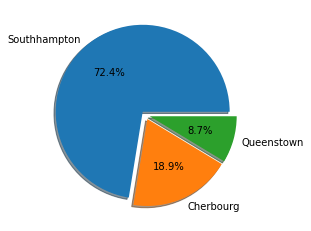

In [13]:
temp = titanic['Embarked'].value_counts()
print(temp)
plt.pie(temp.values,labels=temp.index,autopct='%.1f%%',
       explode=[0.05,0.05,0.05],shadow=True)
plt.show()

## 5.종합실습

credit 데이터에서 아래 범주에 대한 기초통계량과 시각화로 데이터를 분석하시오.

|	칼럼명	|	설명	|		|	값 설명	|
|	----	|	----	|	----	|	----	|
|	**Creditability**	|	Creditability	|	신용도	|	0 : 낮은 신용도, 1 : 높은 신용도, **Target**	|
|	AccountBalance	|	Account Balance	|	은행잔고	|	1: No account, 2 : None (No balance), 3 : Some Balance	|
|	CreditDuration	|	Duration of Credit (month)	|	 신청한 대출기간(월)	|	숫자	|
|	CreditAmount	|	Credit Amount($)	|	신청한 대출금액	|	숫자	|
|	Employment	|	Length of current employment(Month)	|	현 직업 근무 기간	|	1: Unemployed, 2: <1 Year, 3: [1, 4), 4: [4, 7), 5: Above 7	|
|	SexMarital	|	Sex & Marital Status	|	성별 & 결혼상태	|	1: Male, Divorced, 2: Male, Single, 3: Male, Married/Widowed, 4: Female	|
|	CurrentAddress	|	Duration in Current address	|	현 거주지 거주기간	|	1: <1 Year , 2: [1, 4), 3: [4, 7), 4: Above 7	|
|	Age	|	Age (years)	|	나이	|	숫자	|
|	Occupation	|	Occupation	|	직업	|	1: Unemployed, unskilled, 2: Unskilled Permanent Resident, 3: Skilled, 4: Executive	|
|	ForeignWorker	|	Foreign Worker	|	외국인 근로자 여부	|	1: No, 2: Yes	|

① AccountBalance

count    1000.000000
mean        2.183000
std         0.835589
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: AccountBalance, dtype: float64
0
3    457
1    274
2    269
Name: AccountBalance, dtype: int64


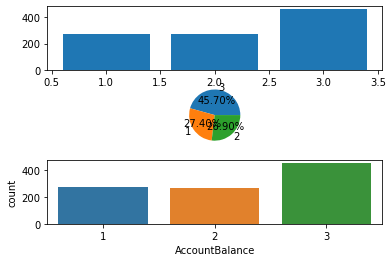

In [18]:
print(credit['AccountBalance'].describe())
print(credit['AccountBalance'].isna().sum())
val = credit['AccountBalance'].value_counts()
print(val)
plt.subplot(3,1,1)
plt.bar(val.index,val.values)
plt.subplot(3,1,2)
plt.pie(val.values,labels=val.index, autopct='%.2f%%')
plt.subplot(3,1,3)
sns.countplot(credit['AccountBalance'])
plt.show()

② Employment

count    1000.000000
mean        3.384000
std         1.208306
min         1.000000
25%         3.000000
50%         3.000000
75%         5.000000
max         5.000000
Name: Employment, dtype: float64
0
3    339
5    253
4    174
2    172
1     62
Name: Employment, dtype: int64


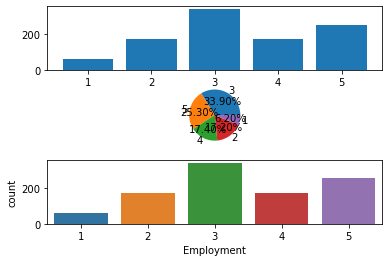

In [23]:
print(credit['Employment'].describe())
print(credit['Employment'].isna().sum())
val = credit['Employment'].value_counts()
print(val)
plt.subplot(3,1,1)
plt.bar(val.index,val.values)
plt.subplot(3,1,2)
plt.pie(val.values, labels=val.index,autopct='%.2f%%')
plt.subplot(3,1,3)
sns.countplot(credit['Employment'])
plt.show()

③ Occupation

count    1000.000000
mean        2.904000
std         0.653614
min         1.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: Occupation, dtype: float64
0
3    630
2    200
4    148
1     22
Name: Occupation, dtype: int64


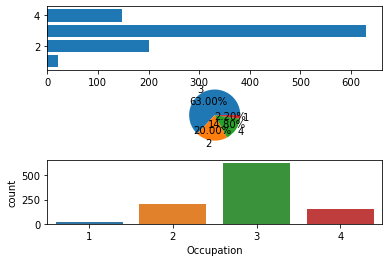

In [28]:
print(credit['Occupation'].describe())
print(credit['Occupation'].isna().sum())
val = credit['Occupation'].value_counts()
print(val)
plt.subplot(3,1,1)
plt.barh(val.index,val.values)
plt.subplot(3,1,2)
plt.pie(val.values,labels=val.index,autopct='%.2f%%')
plt.subplot(3,1,3)
sns.countplot(credit['Occupation'])
plt.show()